# **Malaysia Public Transport Optimization**

This notebook focuses on enhancing the ridership dataset through feature engineering and transformation. It includes:
- Deriving new features such as total ridership and time-based attributes (e.g., year, month)
- Aggregating ridership data to reveal monthly trends across transport modes
- Analyzing mode-specific ridership behaviors using statistical summaries and correlation matrices

The end product is to reshape and enrich the dataset for better pattern discovery and prepare it for advanced modeling and visualization tasks in the next phase.




## **Data Transformation**

### Import dataset and libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("C:/Users/lunwe/Desktop/Malaysia-Public-Transport-Optimization")

In [4]:
df = pd.read_csv("data/processed/ridership_cleaned.csv")
df.head()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,total_ridership
0,2019-01-01,0.0,0.0,0.0,113357,114173,139634,35804,0.0,0.0,0.0,0.0,0.0,0.0,402968.0
1,2019-01-02,0.0,0.0,0.0,182715,169316,274224,31859,0.0,0.0,0.0,0.0,0.0,0.0,658114.0
2,2019-01-03,0.0,0.0,0.0,187904,175304,286469,31893,0.0,0.0,0.0,0.0,0.0,0.0,681570.0
3,2019-01-04,0.0,0.0,0.0,198420,187891,304755,34121,0.0,0.0,0.0,0.0,0.0,0.0,725187.0
4,2019-01-05,0.0,0.0,0.0,120773,112660,145036,29950,0.0,0.0,0.0,0.0,0.0,0.0,408419.0


In [5]:
# Minor correction: Changing float column into int column

float_cols = df.select_dtypes(include='float').columns
df[float_cols] = df[float_cols].astype(int)

# Changing date column to datetime format

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2373 non-null   datetime64[ns]
 1   bus_rkl             2373 non-null   int32         
 2   bus_rkn             2373 non-null   int32         
 3   bus_rpn             2373 non-null   int32         
 4   rail_lrt_ampang     2373 non-null   int64         
 5   rail_mrt_kajang     2373 non-null   int64         
 6   rail_lrt_kj         2373 non-null   int64         
 7   rail_monorail       2373 non-null   int64         
 8   rail_mrt_pjy        2373 non-null   int32         
 9   rail_ets            2373 non-null   int32         
 10  rail_intercity      2373 non-null   int32         
 11  rail_komuter_utara  2373 non-null   int32         
 12  rail_tebrau         2373 non-null   int32         
 13  rail_komuter        2373 non-null   int32       

In [6]:
df.head(5)

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,total_ridership
0,2019-01-01,0,0,0,113357,114173,139634,35804,0,0,0,0,0,0,402968
1,2019-01-02,0,0,0,182715,169316,274224,31859,0,0,0,0,0,0,658114
2,2019-01-03,0,0,0,187904,175304,286469,31893,0,0,0,0,0,0,681570
3,2019-01-04,0,0,0,198420,187891,304755,34121,0,0,0,0,0,0,725187
4,2019-01-05,0,0,0,120773,112660,145036,29950,0,0,0,0,0,0,408419


### **Feature Engineering**

### Date-Based Features

In [8]:
# Create additional date-based features

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek
df['is_weekend'] = df['weekday'].isin([5, 6])

In [9]:
df.head(10)

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,rail_intercity,rail_komuter_utara,rail_tebrau,rail_komuter,total_ridership,year,month,weekday,is_weekend
0,2019-01-01,0,0,0,113357,114173,139634,35804,0,0,0,0,0,0,402968,2019,1,1,False
1,2019-01-02,0,0,0,182715,169316,274224,31859,0,0,0,0,0,0,658114,2019,1,2,False
2,2019-01-03,0,0,0,187904,175304,286469,31893,0,0,0,0,0,0,681570,2019,1,3,False
3,2019-01-04,0,0,0,198420,187891,304755,34121,0,0,0,0,0,0,725187,2019,1,4,False
4,2019-01-05,0,0,0,120773,112660,145036,29950,0,0,0,0,0,0,408419,2019,1,5,True
5,2019-01-06,0,0,0,101145,95913,120032,25342,0,0,0,0,0,0,342432,2019,1,6,True
6,2019-01-07,0,0,0,197569,184365,301290,31988,0,0,0,0,0,0,715212,2019,1,0,False
7,2019-01-08,0,0,0,196879,185920,304680,31792,0,0,0,0,0,0,719271,2019,1,1,False
8,2019-01-09,0,0,0,197314,188770,307069,32305,0,0,0,0,0,0,725458,2019,1,2,False
9,2019-01-10,0,0,0,198876,189818,310510,32057,0,0,0,0,0,0,731261,2019,1,3,False


### Aggregation

Based on the correlation matrix heatmap, we identified three distinct clusters of transport modes that exhibit similar ridership behavior: Rapid Bus Services, Urban Rail Services, and National Rail Services.

Leveraging these insights, we engineered three new aggregate features — **total_rapidbus, total_urbanrail, and total_nationalrail** — by summing the daily ridership values within each cluster. This aggregation simplifies the dataset while preserving meaningful patterns, enabling more effective analysis and modeling in subsequent steps.

In [12]:
# Rapid Bus
bus_cols = ['bus_rkl', 'bus_rpn', 'bus_rkn']
df['total_rapidbus'] = df[bus_cols].sum(axis=1)

# Urban Rail (LRT, MRT, Monorail)
urban_rail_cols = ['rail_lrt_kj', 'rail_lrt_ampang', 'rail_monorail', 'rail_mrt_kajang', 'rail_mrt_pjy']
df['total_urbanrail'] = df[urban_rail_cols].sum(axis=1)

# National Rail (KTM & others)
national_rail_cols = ['rail_komuter', 'rail_komuter_utara', 'rail_ets', 'rail_tebrau', 'rail_intercity']
df['total_nationalrail'] = df[national_rail_cols].sum(axis=1)

In [13]:
df[['date', 'total_rapidbus', 'total_urbanrail', 'total_nationalrail']].head()

,date,total_rapidbus,total_urbanrail,total_nationalrail
0,2019-01-01,0,402968,0
1,2019-01-02,0,658114,0
2,2019-01-03,0,681570,0
3,2019-01-04,0,725187,0
4,2019-01-05,0,408419,0


In [14]:
df.head()

,date,bus_rkl,bus_rkn,bus_rpn,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,...,rail_tebrau,rail_komuter,total_ridership,year,month,weekday,is_weekend,total_rapidbus,total_urbanrail,total_nationalrail
0,2019-01-01,0,0,0,113357,114173,139634,35804,0,0,...,0,0,402968,2019,1,1,False,0,402968,0
1,2019-01-02,0,0,0,182715,169316,274224,31859,0,0,...,0,0,658114,2019,1,2,False,0,658114,0
2,2019-01-03,0,0,0,187904,175304,286469,31893,0,0,...,0,0,681570,2019,1,3,False,0,681570,0
3,2019-01-04,0,0,0,198420,187891,304755,34121,0,0,...,0,0,725187,2019,1,4,False,0,725187,0
4,2019-01-05,0,0,0,120773,112660,145036,29950,0,0,...,0,0,408419,2019,1,5,True,0,408419,0


In [15]:
df.shape

(2373, 22)

## **Post Transformation EDA**

### Comparison between weekend and weekday average ridership

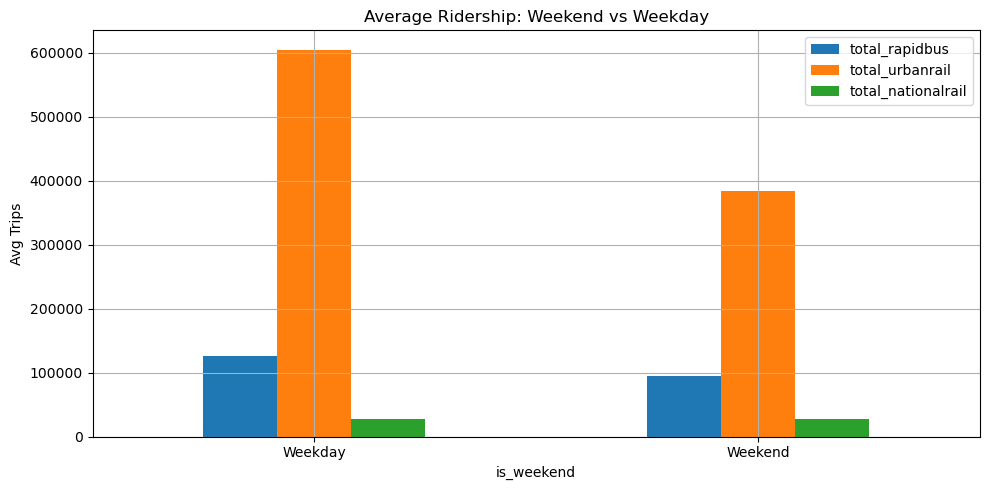

In [17]:
# Compare weekend vs weekday for each transport cluster
weekend_group = df.groupby('is_weekend')[['total_rapidbus', 'total_urbanrail', 'total_nationalrail']].mean()

weekend_group.plot(kind='bar', figsize=(10,5))
plt.title("Average Ridership: Weekend vs Weekday")
plt.ylabel("Avg Trips")
plt.xticks([0,1], ['Weekday', 'Weekend'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

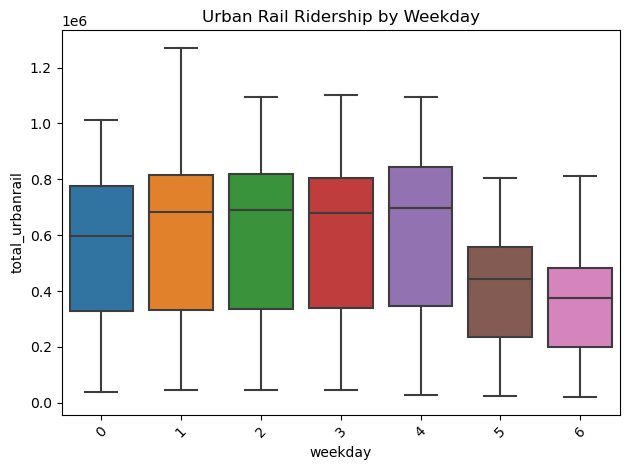

In [18]:
sns.boxplot(x='weekday', y='total_urbanrail', data=df)
plt.title("Urban Rail Ridership by Weekday")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

To further understand behavioral patterns in public transport usage, we analyzed ridership across different days and months.

**Weekend vs Weekday**: **Urban rail ridership** drops significantly on weekends refering to **weekday 5 & 6**, suggesting a heavy reliance on weekday commuters. 

In [20]:
# Add new time-based columns if not done yet
df['weekday'] = df['date'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])

# Group by is_weekend
week_stats = df.groupby('is_weekend')[['total_rapidbus', 'total_urbanrail', 'total_nationalrail']].mean()

# Rename for clarity
week_stats.index = ['Weekday', 'Weekend']
print("Average Ridership:\n", week_stats)

# Calculate % drop from weekday to weekend
percentage_drop = ((week_stats.loc['Weekday'] - week_stats.loc['Weekend']) / week_stats.loc['Weekday']) * 100
percentage_drop = percentage_drop.round(2)
print("\nPercentage Drop from Weekday to Weekend:\n",percentage_drop)

Average Ridership:
          total_rapidbus  total_urbanrail  total_nationalrail
Weekday   126483.061947    604759.976401        28223.403540
Weekend    95078.138643    383950.402655        27690.179941

Percentage Drop from Weekday to Weekend:
 total_rapidbus        24.83
total_urbanrail       36.51
total_nationalrail     1.89
dtype: float64


**Compared to weekdays:**

- **Urban rail ridership** drops by approximately **36.5%** on weekends — a clear indicator of weekday commuter dominance.
- **Rapid bus ridership** shows a moderate **24.8%** drop, suggesting it’s also heavily used for weekday commuting, though less pronounced than rail.
- **National rail services** show **only a 1.9% decrease** on weekends — indicating relatively stable demand, possibly driven by both work and leisure intercity travel.

### Average Monthly Ridership Patterns by Transport Cluster

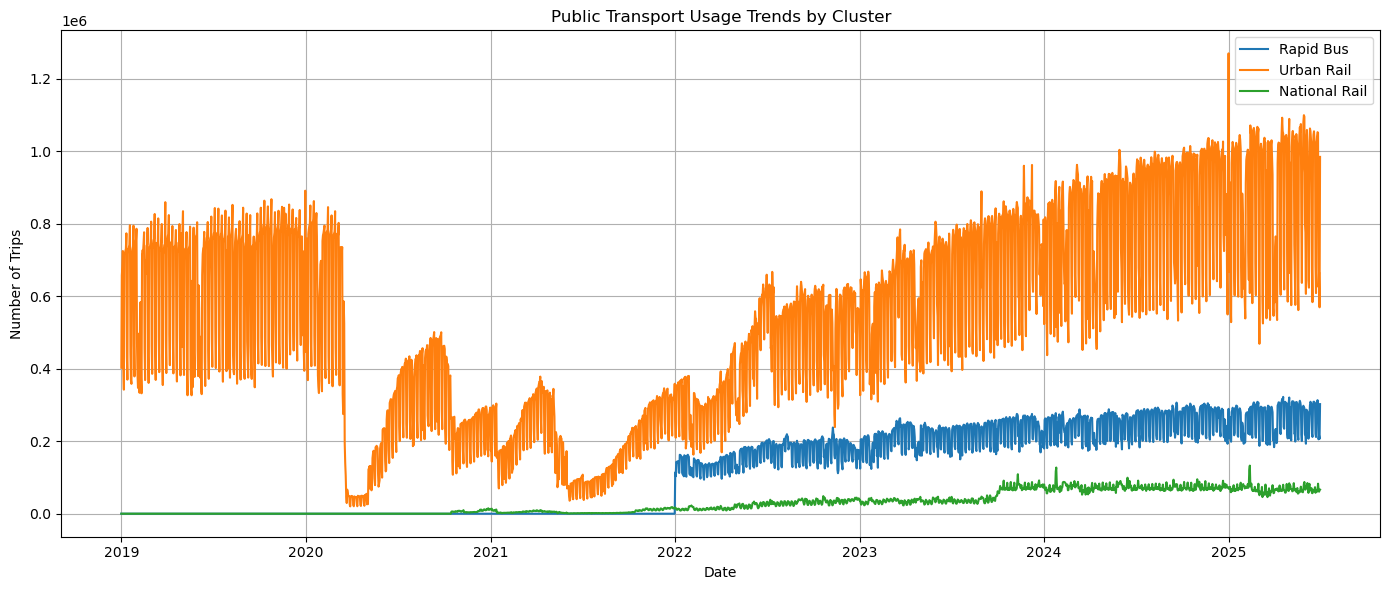

In [23]:
# Basic statistics of new columns
df[['total_rapidbus', 'total_urbanrail', 'total_nationalrail']].describe()

# Visual trend over time
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['total_rapidbus'], label='Rapid Bus')
plt.plot(df['date'], df['total_urbanrail'], label='Urban Rail')
plt.plot(df['date'], df['total_nationalrail'], label='National Rail')
plt.title("Public Transport Usage Trends by Cluster")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot above, it is evident that the **Urban Rail cluster consistently dominates total public transport ridership**, followed by Rapid Bus and then National Rail. The sharp decline around March 2020 reflects the impact of the Movement Control Order (MCO) during the COVID-19 pandemic. <br>
While Urban Rail shows a significant drop and gradual recovery, data for Rapid Bus and National Rail appears sparse during earlier years, likely due to **missing records or delayed data collection**. Their consistent presence in later years indicates that these modes were only recorded or publicly operated after the MCO, contributing to earlier data gaps.

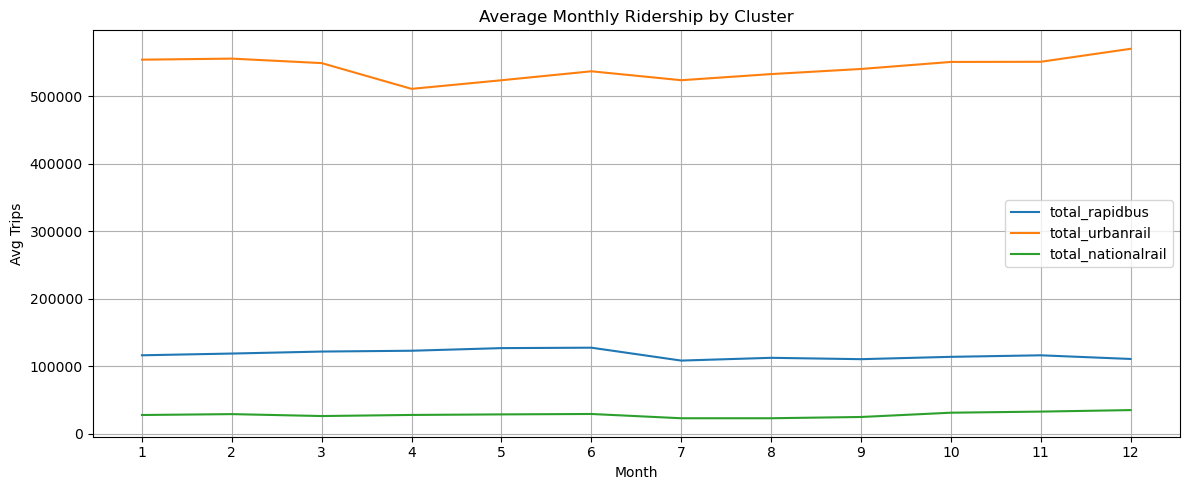

In [25]:
# Group by month and average
monthly_avg = df.groupby(df['month'])[['total_rapidbus', 'total_urbanrail', 'total_nationalrail']].mean()

monthly_avg.plot(figsize=(12,5))
plt.title("Average Monthly Ridership by Cluster")
plt.xlabel("Month")
plt.ylabel("Avg Trips")
plt.grid(True)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

As shown in the previous plot, Urban Rail accounts for the majority of ridership, averaging over **500,000 trips per month**. This is followed by Rapid Bus services, with an average of above 100,000 trips, while National Rail services record the lowest usage, averaging below 100,000 trips per month.

### **Export Transformed Data**

In [32]:
df.to_csv("data/processed/ridership_transformed.csv", index=False)